<a href="https://colab.research.google.com/github/monahatami1/pb_datascience/blob/master/week2_pb_ds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('df.csv')

In [ ]:
df

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),3.5,Hopper\n3.5,"New York, NY",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),4.5,Noom US\n4.5,"New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable
2,Data Science Manager,$111K-$181K (Glassdoor est.),-1.0,Decode_M,"New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable
3,Data Analyst,$111K-$181K (Glassdoor est.),3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable
4,"Director, Data Science",$111K-$181K (Glassdoor est.),3.4,United Entertainment Group\n3.4,"New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable
...,...,...,...,...,...,...,...,...,...,...,...
5887,Manufacturing Data Analyst Engineer,$42K - $76K (Glassdoor est.),3.6,Hose Master\n3.6,"Euclid, OH",201 to 500 Employees,1982,Company - Private,Electrical & Electronic Manufacturing,Manufacturing,Unknown / Non-Applicable
5888,Data Scientist,-1,4.9,Bluetree Network\n4.9,"Madison, WI",-1,-1,-1,-1,-1,-1
5889,Supply Chain Consultant - Data Scientist,-1,4.0,"Kimberly-Clark Corporation, LLC\n4.0","Neenah, WI",10000+ Employees,1872,Company - Public,Consumer Products Manufacturing,Manufacturing,$10+ billion (USD)
5890,Data Science Engineer,-1,4.0,AE Business Solutions\n4.0,"Madison, WI",51 to 200 Employees,1949,Company - Private,Computer Hardware & Software,Information Technology,$25 to $50 million (USD)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5892 entries, 0 to 5891
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          5892 non-null   object 
 1   Salary Estimate    5892 non-null   object 
 2   Rating             5892 non-null   float64
 3   Company Name       5892 non-null   object 
 4   Location           5892 non-null   object 
 5   Size               5892 non-null   object 
 6   Founded            5892 non-null   object 
 7   Type of ownership  5892 non-null   object 
 8   Industry           5892 non-null   object 
 9   Sector             5892 non-null   object 
 10  Revenue            5892 non-null   object 
dtypes: float64(1), object(10)
memory usage: 506.5+ KB


In [ ]:
df['Job Title'].value_counts()

Data Scientist                              703
Data Analyst                                362
Data Engineer                               317
Senior Data Scientist                       141
Machine Learning Engineer                    72
                                           ... 
Scientist Medical Laboratory II               1
IT Data Science Analyst                       1
Research Scientist Associate IV               1
Laboratory Scientist II                       1
Supply Chain Consultant - Data Scientist      1
Name: Job Title, Length: 2959, dtype: int64

In [ ]:
df['Rating'].value_counts()

-1.0    710
 3.9    451
 3.8    442
 4.0    415
 4.1    405
 3.7    395
 3.6    347
 3.5    290
 4.2    286
 3.4    240
 4.3    215
 3.3    194
 5.0    194
 3.2    166
 3.1    146
 4.5    143
 4.4    126
 4.6    110
 4.7     84
 4.8     77
 3.0     73
 2.9     70
 2.8     67
 4.9     61
 2.5     35
 2.6     34
 2.7     33
 2.4     20
 2.3     13
 2.2     11
 1.0     10
 1.6      9
 2.1      7
 2.0      4
 1.9      4
 1.5      2
 1.7      2
 1.8      1
Name: Rating, dtype: int64

In [ ]:
df['Location'].value_counts()

Austin, TX         345
Chicago, IL        333
San Diego, CA      331
New York, NY       303
Los Angeles, CA    234
                  ... 
Redlands, CA         1
Pittsburg, CA        1
Elk Grove, CA        1
Coronado, CA         1
Wisconsin, WI        1
Name: Location, Length: 545, dtype: int64

In [ ]:
# Remove instances without salary estimates
df = df[df['Salary Estimate'] != '-1']

## Remove K and $
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.replace('K', '').replace('$', ''))

## Add hourly and employer provided binary columns
df['Hourly'] = df['Salary Estimate'].apply(lambda x: 1 if 'per hour' in x.lower() else 0)
df['Employer_provided'] = df['Salary Estimate'].apply(lambda x: 1 if 'employer est' in x.lower() else 0)

## Add min, max, and average salary columns and cast them into integer type
df['Min_salary'] = df['Salary Estimate'].apply(lambda x: int(x.split('-')[0]))
# df['Max_salary'] = df['Salary Estimate'].apply(lambda x: int(x.split('$')[1]))
df['Max_salary'] = df['Salary Estimate'].apply(lambda x: x.split('-')[1]).replace('[^0-9]', '', regex=True)
df['Max_salary'] = df['Max_salary'].apply(int)

### Convert hourly wages to annual
df['Min_salary'] = df.apply(lambda x: x.Min_salary if x.Hourly == 0 else x.Min_salary*2.05, axis=1)
df['Max_salary'] = df.apply(lambda x: x.Max_salary if x.Hourly == 0 else x.Max_salary*2.05, axis=1)

df['Average_salary'] = (df.Min_salary + df.Max_salary)/2

## Remove the initial salary estimate column
df.drop('Salary Estimate', axis=1, inplace=True)

#%% Rating

## Ensure ratings are float type
df['Rating'] = df['Rating'].apply(lambda x: float(x))

#%% Company name

## Remove rating from the end of company names
df['Company Name'] = df['Company Name'].apply(lambda x: x.split('\n')[0])

#%% State: what state is the job in

df['State'] = df['Location'].apply(lambda x: x.split()[-1])
df = df[df.State != 'Kingdom'] # remove United Kingdom
df = df[df.State != 'States'] # remove United States
#%% Company age

# Replace non-numeric cells in Founded column with -1
df['Founded'].replace('[^0-9]', -1, regex=True, inplace=True)

df['Company_age'] = df['Founded'].apply(lambda x: 2021-int(x) if int(x)>0 else -1)


#%% Organize job titles

def title_organizer(x):
    x = x.lower()
    if ('data scientist' in x) or ('data science' in x) :
        return 'data scientist'
    elif 'data engineer' in x:
        return 'data engineer'
    elif 'deep learning' in x:
        return 'deep learning engineer'
    elif 'machine learning' in x:
        return 'machine learning engineer'
    elif 'director' in x:
        return 'director'
    elif 'manager' in x:
        return 'manager'
    elif 'analyst' in x:
        return 'analyst'
    elif 'researcher' in x:
        return 'researcher'
    else:
        return 'other'
df['Title'] = df['Job Title'].apply(title_organizer)

#%% Senior position?

def senior_junior(x):
    x = x.lower()
    if 'sr' in x or 'senior' in x or 'sr.' in x or 'lead' in x or 'principal' in x or 'vp' in x or 'manager' in x:
        return 'senior'
    elif 'jr' in x or 'junior' in x or 'jr.' in x:
        return 'junior'
    else:
        return 'other'
df['Seniority'] = df['Job Title'].apply(senior_junior)

#%% Size

df['Size'].replace('Unknown', '-1', regex=True, inplace=True)
df['Size'] = df['Size'].str.lower()

#%% Type of ownership

df['Type of ownership'].replace('Unknown', '-1', regex=True, inplace=True)

#%% Drop unwanted columns, reorder the remining columns, and write the dataframe to csv format

# Max_salary and Min_salary are dropped too because we calculated the
# response variable, Average_salary, by using them.
df.drop(['Company Name', 'Location', 'Founded', 'Job Title',
         'Revenue', 'Min_salary', 'Max_salary'], inplace=True,
        axis=1)

df = df.reindex(columns=['Average_salary', 'Title','Seniority',
                         'Rating', 'Hourly', 'Employer_provided',
                         'Company_age',
                         'Industry', 'Sector', 'Type of ownership',
                         'Size', 'State'])

<ipython-input-15-241c35cd6a8e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.replace('K', '').replace('$', ''))
<ipython-input-15-241c35cd6a8e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hourly'] = df['Salary Estimate'].apply(lambda x: 1 if 'per hour' in x.lower() else 0)
<ipython-input-15-241c35cd6a8e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [ ]:
df

,Average_salary,Title,Seniority,Rating,Hourly,Employer_provided,Company_age,Industry,Sector,Type of ownership,Size,State
0,146.000,data scientist,senior,3.5,0,0,14,Travel Agencies,Travel & Tourism,Company - Private,501 to 1000 employees,NY
1,146.000,data scientist,other,4.5,0,0,13,"Health, Beauty, & Fitness",Consumer Services,Company - Private,1001 to 5000 employees,NY
2,146.000,data scientist,senior,-1.0,0,0,-1,-1,-1,-1,1 to 50 employees,NY
3,146.000,analyst,other,3.4,0,0,2,Internet,Information Technology,Company - Private,201 to 500 employees,NJ
4,146.000,data scientist,other,3.4,0,0,14,Advertising & Marketing,Business Services,Company - Private,51 to 200 employees,NY
...,...,...,...,...,...,...,...,...,...,...,...,...
5882,68.000,other,other,4.2,0,0,75,Federal Agencies,Government,Government,10000+ employees,OH
5883,89.500,other,senior,4.0,0,0,13,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,Company - Public,501 to 1000 employees,OH
5886,89.000,analyst,senior,4.0,0,0,13,Computer Hardware & Software,Information Technology,Company - Public,1001 to 5000 employees,OH
5887,59.000,analyst,other,3.6,0,0,39,Electrical & Electronic Manufacturing,Manufacturing,Company - Private,201 to 500 employees,OH


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5522 entries, 0 to 5891
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Average_salary     5522 non-null   float64
 1   Title              5522 non-null   object 
 2   Seniority          5522 non-null   object 
 3   Rating             5522 non-null   float64
 4   Hourly             5522 non-null   int64  
 5   Employer_provided  5522 non-null   int64  
 6   Company_age        5522 non-null   int64  
 7   Industry           5522 non-null   object 
 8   Sector             5522 non-null   object 
 9   Type of ownership  5522 non-null   object 
 10  Size               5522 non-null   object 
 11  State              5522 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 560.8+ KB


<Axes: ylabel='Frequency'>

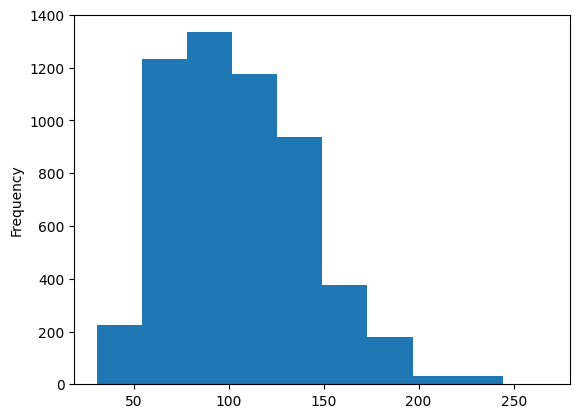

In [ ]:
df['Average_salary'].plot.hist()

<Axes: ylabel='Frequency'>

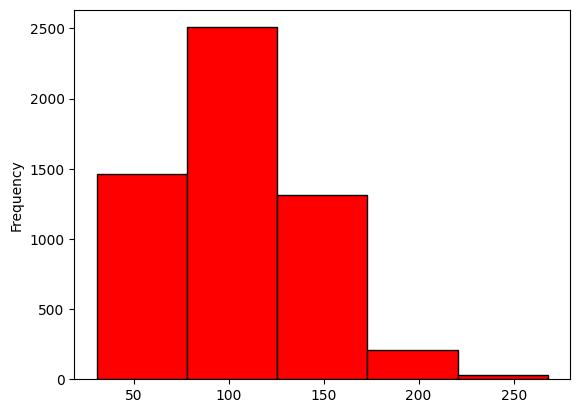

In [ ]:
df['Average_salary'].plot.hist(bins=5, color='red', edgecolor='black')

In [ ]:
state = df['State'].value_counts()

<Axes: >

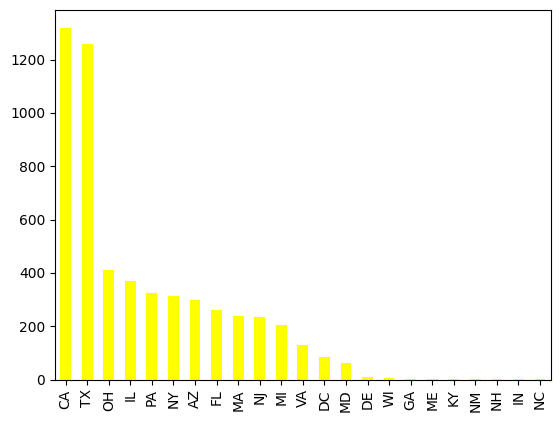

In [ ]:
state.plot(kind= 'bar',color = 'yellow')